Best k: 14 with accuracy: 0.9412


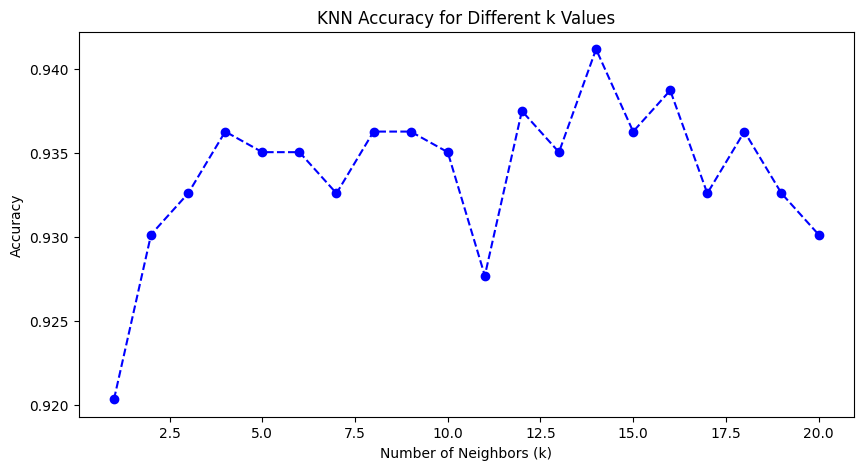

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

data = pd.read_csv('7.csv')

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data["species"])

X = data.drop("species", axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

best_k = 1
best_accuracy = 0
accuracy_scores = []

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    accuracy_scores.append(acc)
    
    if acc > best_accuracy:
        best_accuracy = acc
        best_k = k

print(f"Best k: {best_k} with accuracy: {best_accuracy:.4f}")

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(range(1, 21), accuracy_scores, marker='o', linestyle='dashed', color='b')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy for Different k Values")
plt.show()
